In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('../data/heart-disease.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


No missing data, no need to drop or impute.
All data are numerical, no need to transform.

In [5]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#see how many positive(1) and negative (0) samples in our data
df.value_counts('target')

target
1    165
0    138
dtype: int64

In [8]:
#by ratio
df.value_counts('target', normalize=True)

target
1    0.544554
0    0.455446
dtype: float64

We can observe this is quite a balanced dataset (target numbers are almost even)

In [9]:
#let's see the breakdown by gender. Male = 1, female = 0
df.value_counts('sex')

sex
1    207
0     96
dtype: int64

In [10]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [16]:
sum(df[df['sex']==1]['target']==1)

93

In [25]:
#% of heart disease in sample by gender
males = sum(df['sex']==1)
pos_males = sum(df[df['sex']==1]['target']==1)
print('There are {} positive cases in males, which is {:.1f}%'.format(pos_males, pos_males/males*100))

There are 93 positive cases in males, which is 44.9%


In [28]:
#% of heart disease in sample by gender
females = sum(df['sex']==0)
pos_females = sum(df[df['sex']==0]['target']==1)
print('There are {} positive cases in females, which is {:.1f}%'.format(pos_females, pos_females/females*100))

There are 72 positive cases in females, which is 75.0%


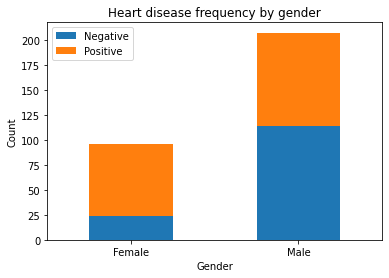

In [39]:
pd.crosstab(df.sex, df.target).plot(kind='bar', stacked=True);
plt.legend(["Negative", "Positive"]);
plt.xticks(ticks=[0,1], labels=["Female", "Male"],
           rotation=0);
plt.title("Heart disease frequency by gender");
plt.xlabel("Gender")
plt.ylabel("Count");

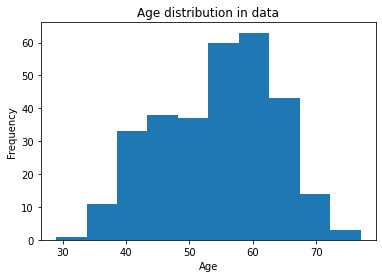

In [47]:
#now let's check the age distribution
df.age.plot.hist();
plt.xlabel("Age");
plt.title("Age distribution in data");

Note that we do not have a lot of data for 30 years or younger - will not be very helpful in predicting for patients in that age range.